## Business Understanding

### Overview

The film industry is a dynamic global market , encompassing all stages of movie creation and distribution, with a powerful cultural and economic influence. As more companies enter the realm of original content, understanding which films resonate most with audiences becomes essential. Analyzing box office trends helps newcomers identify popular genres, profitable themes, and audience preferences, informing smart production choices. This data-driven approach equips new studios to craft engaging content, align with viewer interests, and improve their chances of making a lasting impact in a competitive landscape.

### Business Problem

ABC company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create

### Objectives

1. Identify Popular Film Genres by popularity

2. Identify Popular Film Genres by popularity 

3. Identify Emerging Trends and Audience Preferences 

4. Identify months with highest profit 

## Data Understanding
After carefully analysising the data provided in relation to the business problem and the business understanding question. I have selected the following datasets together with the columns that will be used in each particular dataset. The primary key is movie_title

1. [im.db.zip](https://github.com/learn-co-curriculum/dsc-phase-2-project-v3/tree/main/zippedData)
2. [tn.movie_budgets.csv.gz](https://github.com/learn-co-curriculum/dsc-phase-2-project-v3/blob/main/zippedData/tn.movie_budgets.csv.gz)
3. [bom.movie_gross.csv.gz](https://github.com/learn-co-curriculum/dsc-phase-2-project-v3/blob/main/zippedData/bom.movie_gross.csv.gz)
4. [tmdb.movies.csv.gz](https://github.com/learn-co-curriculum/dsc-phase-2-project-v3/blob/main/zippedData/tmdb.movies.csv.gz)

In [1]:
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

import pickle

# creation of cleaned_gross_budget.csv

In [2]:
bom = pd.read_csv('bom.movie_gross.csv')
bom2 = bom.rename(columns={'title': 'movie'})
bom3 = bom2.drop(['domestic_gross', 'year'], axis=1)
bom3.head()

,movie,studio,foreign_gross
0,Toy Story 3,BV,652000000
1,Alice in Wonderland (2010),BV,691300000
2,Harry Potter and the Deathly Hallows Part 1,WB,664300000
3,Inception,WB,535700000
4,Shrek Forever After,P/DW,513900000


In [3]:
tnmovie = pd.read_csv('tn.movie_budgets.csv')
tnmovie1 = tnmovie.drop(['id'], axis=1)
tnmovie1.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
gross_budget= pd.merge(bom3, tnmovie1, on='movie', how='inner')
gross_budget.head()

,movie,studio,foreign_gross,release_date,production_budget,domestic_gross,worldwide_gross
0,Toy Story 3,BV,652000000,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,535700000,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,513900000,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,398000000,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,311500000,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"


In [5]:
gross_budget.rename(columns={"movie":"original_title"}, inplace=True)

In [6]:
gross_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   original_title     1247 non-null   object
 1   studio             1246 non-null   object
 2   foreign_gross      1086 non-null   object
 3   release_date       1247 non-null   object
 4   production_budget  1247 non-null   object
 5   domestic_gross     1247 non-null   object
 6   worldwide_gross    1247 non-null   object
dtypes: object(7)
memory usage: 68.3+ KB


In [7]:
for col in ['production_budget', 'domestic_gross', 'worldwide_gross']:

    gross_budget[col] = gross_budget[col].replace({'\\$': '', ',': ''}, regex=True).astype(float)
gross_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_title     1247 non-null   object 
 1   studio             1246 non-null   object 
 2   foreign_gross      1086 non-null   object 
 3   release_date       1247 non-null   object 
 4   production_budget  1247 non-null   float64
 5   domestic_gross     1247 non-null   float64
 6   worldwide_gross    1247 non-null   float64
dtypes: float64(3), object(4)
memory usage: 68.3+ KB


In [8]:
# Convert foreign gross from string to numeric
gross_budget['foreign_gross'] = pd.to_numeric(gross_budget['foreign_gross'], errors='coerce') 
gross_budget['production_budget'] = pd.to_numeric(gross_budget['production_budget'], errors='coerce')
gross_budget['domestic_gross'] = pd.to_numeric(gross_budget['domestic_gross'], errors='coerce')
gross_budget['worldwide_gross'] = pd.to_numeric(gross_budget['worldwide_gross'], errors='coerce')
gross_budget.head()

,original_title,studio,foreign_gross,release_date,production_budget,domestic_gross,worldwide_gross
0,Toy Story 3,BV,652000000.0,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09
1,Inception,WB,535700000.0,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08
2,Shrek Forever After,P/DW,513900000.0,"May 21, 2010",165000000.0,238736787.0,7.562447e+08
3,The Twilight Saga: Eclipse,Sum.,398000000.0,"Jun 30, 2010",68000000.0,300531751.0,7.061028e+08
4,Iron Man 2,Par.,311500000.0,"May 7, 2010",170000000.0,312433331.0,6.211564e+08


In [9]:
gross_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_title     1247 non-null   object 
 1   studio             1246 non-null   object 
 2   foreign_gross      1082 non-null   float64
 3   release_date       1247 non-null   object 
 4   production_budget  1247 non-null   float64
 5   domestic_gross     1247 non-null   float64
 6   worldwide_gross    1247 non-null   float64
dtypes: float64(4), object(3)
memory usage: 68.3+ KB


In [10]:
gross_budget.isna().sum()

original_title         0
studio                 1
foreign_gross        165
release_date           0
production_budget      0
domestic_gross         0
worldwide_gross        0
dtype: int64

In [11]:
# drop missing values in every colum 
for column in gross_budget.columns:
    gross_budget = gross_budget.dropna(subset=[column])

gross_budget.isna().sum()


original_title       0
studio               0
foreign_gross        0
release_date         0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [12]:
gross_budget.duplicated().sum()

0

In [13]:
gross_budget.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1081 entries, 0 to 1244
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_title     1081 non-null   object 
 1   studio             1081 non-null   object 
 2   foreign_gross      1081 non-null   float64
 3   release_date       1081 non-null   object 
 4   production_budget  1081 non-null   float64
 5   domestic_gross     1081 non-null   float64
 6   worldwide_gross    1081 non-null   float64
dtypes: float64(4), object(3)
memory usage: 67.6+ KB


In [14]:
gross_budget["profit"] = gross_budget["worldwide_gross"] - gross_budget["production_budget"]

In [15]:
gross_budget['release_date'] = pd.to_datetime(gross_budget['release_date'])

In [16]:
gross_budget["release_date"] = gross_budget["release_date"].dt.month

In [17]:
gross_budget.describe().T

,count,mean,std,min,25%,50%,75%,max
foreign_gross,1081.0,1.010362e+08,1.540983e+08,600.0,10500000.0,38100000.0,112200000.0,9.464000e+08
release_date,1081.0,6.923219e+00,3.487627e+00,1.0,4.0,7.0,10.0,1.200000e+01
production_budget,1081.0,5.183546e+07,5.671559e+07,100000.0,13400000.0,30000000.0,66000000.0,4.106000e+08
domestic_gross,1081.0,6.718373e+07,8.365910e+07,0.0,14945541.0,39175066.0,84273813.0,7.000596e+08
worldwide_gross,1081.0,1.677254e+08,2.286249e+08,0.0,31124367.0,81209222.0,203127894.0,1.403014e+09
profit,1081.0,1.158899e+08,1.886722e+08,-110450242.0,8626300.0,46009334.0,136562435.0,1.148258e+09


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'foreign_gross'),
  Text(1, 0, 'release_date'),
  Text(2, 0, 'production_budget'),
  Text(3, 0, 'domestic_gross'),
  Text(4, 0, 'worldwide_gross'),
  Text(5, 0, 'profit')])

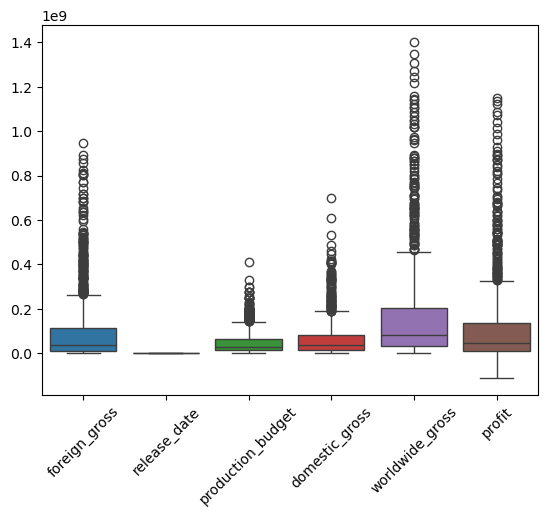

In [54]:
sns.boxplot(data=gross_budget)
plt.xticks(rotation=45)

In [19]:
gross_budget.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1081 entries, 0 to 1244
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_title     1081 non-null   object 
 1   studio             1081 non-null   object 
 2   foreign_gross      1081 non-null   float64
 3   release_date       1081 non-null   int32  
 4   production_budget  1081 non-null   float64
 5   domestic_gross     1081 non-null   float64
 6   worldwide_gross    1081 non-null   float64
 7   profit             1081 non-null   float64
dtypes: float64(5), int32(1), object(2)
memory usage: 71.8+ KB


In [20]:
# save the cleaned data
gross_budget.to_csv('cleaned_gross_budget.csv', index=False)  # Saves without row index

# creation of cleaned_merged_data.csv

In [21]:
tmdb = pd.read_csv('tmdb.movies.csv')
tmdb_drop = tmdb.drop(['Unnamed: 0', 'genre_ids', 'title', 'id'], axis=1)
tmdb_drop.head()

,original_language,original_title,popularity,release_date,vote_average,vote_count
0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,7.7,10788
1,en,How to Train Your Dragon,28.734,2010-03-26,7.7,7610
2,en,Iron Man 2,28.515,2010-05-07,6.8,12368
3,en,Toy Story,28.005,1995-11-22,7.9,10174
4,en,Inception,27.920,2010-07-16,8.3,22186


In [22]:
con = sqlite3.connect("im.db\im.db")
imdb = pd.read_sql("""
SELECT *
FROM sqlite_master
"""
, con)
imdb.head()

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."


In [23]:
movbasic = pd.read_sql("""
select *
from movie_basics
;""", con)
movbasic.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [24]:
movrating = pd.read_sql("""
select *
from movie_ratings
;""", con)
movrating.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [25]:
movies = pd.read_sql("""
select original_title, runtime_minutes, genres, averagerating, numvotes
from movie_basics
join movie_ratings
on movie_basics.movie_id = movie_ratings.movie_id
;""", con)
movies.head(20)

,original_title,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,175.0,"Action,Crime,Drama",7.0,77
1,Ashad Ka Ek Din,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,122.0,Drama,6.9,4517
3,Sabse Bada Sukh,NaN,"Comedy,Drama",6.1,13
4,La Telenovela Errante,80.0,"Comedy,Drama,Fantasy",6.5,119
5,Bigfoot,NaN,"Horror,Thriller",4.1,32
6,Joe Finds Grace,83.0,"Adventure,Animation,Comedy",8.1,263
7,Pál Adrienn,136.0,Drama,6.8,451
8,Oda az igazság,100.0,History,4.6,64
9,Cooper and Hemingway: The True Gen,180.0,Documentary,7.6,53


In [26]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   original_title   73856 non-null  object 
 1   runtime_minutes  66236 non-null  float64
 2   genres           73052 non-null  object 
 3   averagerating    73856 non-null  float64
 4   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 2.8+ MB


In [27]:
merged_data = pd.merge(tmdb_drop, movies, on='original_title', how='inner')
merged_data

,original_language,original_title,popularity,release_date,vote_average,vote_count,runtime_minutes,genres,averagerating,numvotes
0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,7.7,10788,146.0,"Adventure,Fantasy,Mystery",7.7,425530
1,en,How to Train Your Dragon,28.734,2010-03-26,7.7,7610,98.0,"Action,Adventure,Animation",8.1,611299
2,en,Iron Man 2,28.515,2010-05-07,6.8,12368,124.0,"Action,Adventure,Sci-Fi",7.0,657690
3,en,Inception,27.920,2010-07-16,8.3,22186,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
4,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,6.1,4229,118.0,"Adventure,Family,Fantasy",5.9,165108
...,...,...,...,...,...,...,...,...,...,...
17886,en,Fail State,0.600,2018-10-19,0.0,1,93.0,Documentary,6.7,122
17887,en,The Last One,0.600,2018-10-01,0.0,1,80.0,"Documentary,History,News",7.0,26
17888,en,The Last One,0.600,2018-10-01,0.0,1,85.0,"Action,Adventure,Fantasy",6.1,15
17889,en,Trailer Made,0.600,2018-06-22,0.0,1,79.0,Adventure,4.3,25


In [28]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17891 entries, 0 to 17890
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_language  17891 non-null  object 
 1   original_title     17891 non-null  object 
 2   popularity         17891 non-null  float64
 3   release_date       17891 non-null  object 
 4   vote_average       17891 non-null  float64
 5   vote_count         17891 non-null  int64  
 6   runtime_minutes    17394 non-null  float64
 7   genres             17831 non-null  object 
 8   averagerating      17891 non-null  float64
 9   numvotes           17891 non-null  int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 1.4+ MB


In [29]:
merged_data.isna().sum()

original_language      0
original_title         0
popularity             0
release_date           0
vote_average           0
vote_count             0
runtime_minutes      497
genres                60
averagerating          0
numvotes               0
dtype: int64

In [30]:
# drop missing values in every colum 
for column in merged_data.columns:
    merged_data = merged_data.dropna(subset=[column])

print(merged_data.isna().sum())

original_language    0
original_title       0
popularity           0
release_date         0
vote_average         0
vote_count           0
runtime_minutes      0
genres               0
averagerating        0
numvotes             0
dtype: int64


In [31]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17347 entries, 0 to 17890
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_language  17347 non-null  object 
 1   original_title     17347 non-null  object 
 2   popularity         17347 non-null  float64
 3   release_date       17347 non-null  object 
 4   vote_average       17347 non-null  float64
 5   vote_count         17347 non-null  int64  
 6   runtime_minutes    17347 non-null  float64
 7   genres             17347 non-null  object 
 8   averagerating      17347 non-null  float64
 9   numvotes           17347 non-null  int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 1.5+ MB


In [32]:
merged_data = merged_data.drop_duplicates()
merged_data.duplicated().sum()

0

In [33]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16402 entries, 0 to 17890
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_language  16402 non-null  object 
 1   original_title     16402 non-null  object 
 2   popularity         16402 non-null  float64
 3   release_date       16402 non-null  object 
 4   vote_average       16402 non-null  float64
 5   vote_count         16402 non-null  int64  
 6   runtime_minutes    16402 non-null  float64
 7   genres             16402 non-null  object 
 8   averagerating      16402 non-null  float64
 9   numvotes           16402 non-null  int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 1.4+ MB


In [34]:
merged_data['release_date'] = pd.to_datetime(merged_data['release_date'])

In [35]:
merged_data["release_date"] = merged_data["release_date"].dt.month

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'popularity'),
  Text(1, 0, 'release_date'),
  Text(2, 0, 'vote_average'),
  Text(3, 0, 'vote_count'),
  Text(4, 0, 'runtime_minutes'),
  Text(5, 0, 'averagerating'),
  Text(6, 0, 'numvotes')])

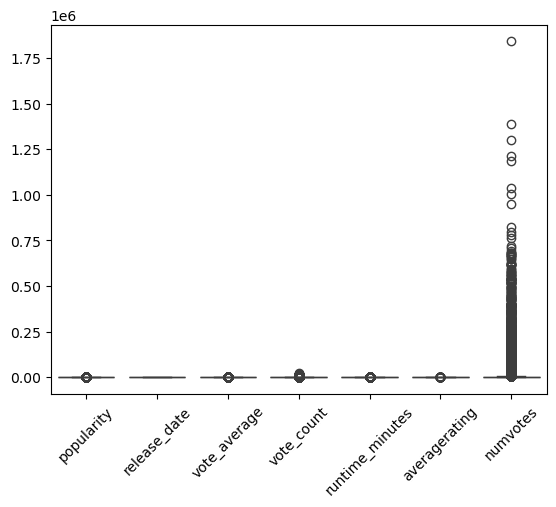

In [53]:
sns.boxplot(data=merged_data)
plt.xticks(rotation=45)

In [37]:
# save the cleaned data
merged_data.to_csv('cleaned_merged_data.csv', index=False)  # Saves without row index

In [38]:
merged_data.head()

,original_language,original_title,popularity,release_date,vote_average,vote_count,runtime_minutes,genres,averagerating,numvotes
0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,11,7.7,10788,146.0,"Adventure,Fantasy,Mystery",7.7,425530
1,en,How to Train Your Dragon,28.734,3,7.7,7610,98.0,"Action,Adventure,Animation",8.1,611299
2,en,Iron Man 2,28.515,5,6.8,12368,124.0,"Action,Adventure,Sci-Fi",7.0,657690
3,en,Inception,27.920,7,8.3,22186,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
4,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2,6.1,4229,118.0,"Adventure,Family,Fantasy",5.9,165108


In [39]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16402 entries, 0 to 17890
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_language  16402 non-null  object 
 1   original_title     16402 non-null  object 
 2   popularity         16402 non-null  float64
 3   release_date       16402 non-null  int32  
 4   vote_average       16402 non-null  float64
 5   vote_count         16402 non-null  int64  
 6   runtime_minutes    16402 non-null  float64
 7   genres             16402 non-null  object 
 8   averagerating      16402 non-null  float64
 9   numvotes           16402 non-null  int64  
dtypes: float64(4), int32(1), int64(2), object(3)
memory usage: 1.3+ MB


In [40]:
gross_budget.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1081 entries, 0 to 1244
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_title     1081 non-null   object 
 1   studio             1081 non-null   object 
 2   foreign_gross      1081 non-null   float64
 3   release_date       1081 non-null   int32  
 4   production_budget  1081 non-null   float64
 5   domestic_gross     1081 non-null   float64
 6   worldwide_gross    1081 non-null   float64
 7   profit             1081 non-null   float64
dtypes: float64(5), int32(1), object(2)
memory usage: 71.8+ KB


Merged the gross_budget and the movies

In [41]:
final_data = pd.merge(movies, gross_budget, on='original_title', how='inner')
final_data.head()

,original_title,runtime_minutes,genres,averagerating,numvotes,studio,foreign_gross,release_date,production_budget,domestic_gross,worldwide_gross,profit
0,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,8000000.0,3,25000000.0,720828.0,9313302.0,-15686698.0
1,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,129900000.0,12,91000000.0,58236838.0,187861183.0,96861183.0
2,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26900000.0,9,28000000.0,26017685.0,62108587.0,34108587.0
3,The Rum Diary,119.0,"Comedy,Drama",6.2,94787,FD,10800000.0,10,45000000.0,13109815.0,21544732.0,-23455268.0
4,The Three Stooges,92.0,"Comedy,Family",5.1,28570,Fox,10500000.0,4,30000000.0,44338224.0,54052249.0,24052249.0


In [42]:
final_data.drop(columns="runtime_minutes", inplace=True)

In [43]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158 entries, 0 to 1157
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_title     1158 non-null   object 
 1   genres             1154 non-null   object 
 2   averagerating      1158 non-null   float64
 3   numvotes           1158 non-null   int64  
 4   studio             1158 non-null   object 
 5   foreign_gross      1158 non-null   float64
 6   release_date       1158 non-null   int32  
 7   production_budget  1158 non-null   float64
 8   domestic_gross     1158 non-null   float64
 9   worldwide_gross    1158 non-null   float64
 10  profit             1158 non-null   float64
dtypes: float64(6), int32(1), int64(1), object(3)
memory usage: 95.1+ KB


In [44]:
final_data.isna().sum()

original_title       0
genres               4
averagerating        0
numvotes             0
studio               0
foreign_gross        0
release_date         0
production_budget    0
domestic_gross       0
worldwide_gross      0
profit               0
dtype: int64

In [45]:
final_data['genres'] = final_data['genres'].fillna('Romance')


In [46]:
final_data.isna().sum()

original_title       0
genres               0
averagerating        0
numvotes             0
studio               0
foreign_gross        0
release_date         0
production_budget    0
domestic_gross       0
worldwide_gross      0
profit               0
dtype: int64

Since in some rows Genre has multiple name, we need to split the names to only contain only one mutiple genre

In [47]:
final_data["genres"].head(10)

0       Adventure,Drama,Romance
1        Adventure,Comedy,Drama
2            Action,Crime,Drama
3                  Comedy,Drama
4                 Comedy,Family
5    Adventure,Animation,Comedy
6       Action,Adventure,Sci-Fi
7                        Comedy
8     Action,Adventure,Thriller
9       Horror,Mystery,Thriller
Name: genres, dtype: object

In [48]:
# Keep only the last genre in the 'genres' column
final_data['genres'] = final_data['genres'].apply(lambda x: x.split(',')[-1] if pd.notnull(x) else x)

# Display the updated 'genres' column for the first 10 rows
print(final_data['genres'].head(10))


0     Romance
1       Drama
2       Drama
3       Drama
4      Family
5      Comedy
6      Sci-Fi
7      Comedy
8    Thriller
9    Thriller
Name: genres, dtype: object


In [49]:
# Step 1: Split the genres and create a new row for each genre (explode function)
data_exploded = final_data.drop('profit', axis=1).join(
    final_data['genres'].str.split('|', expand=True).stack().reset_index(drop=True, level=1).rename('genre')
)

# Step 2: Add profit back to the exploded dataframe
data_exploded['profit'] = final_data['profit'].repeat(final_data['genres'].str.split('|').apply(len)).reset_index(drop=True)

# Step 3: Calculate average profit per genre
average_profit_per_genre = data_exploded.groupby('genre')['profit'].mean()

# Step 4: Sort the genres by average profit in descending order
average_profit_per_genre_sorted = average_profit_per_genre.sort_values(ascending=False)

# Step 5: Find the most profitable genre
most_profitable_genre = average_profit_per_genre_sorted.idxmax()
most_profitable_profit = average_profit_per_genre_sorted.max()

# Display the result
print(f"The most profitable genre is: {most_profitable_genre} with an average profit of ${most_profitable_profit:,.2f}")

# Optionally, display the sorted average profit per genre
print("\nAverage profit per genre sorted in descending order:")
print(average_profit_per_genre_sorted)


The most profitable genre is: Animation with an average profit of $339,016,982.00

Average profit per genre sorted in descending order:
genre
Animation      3.390170e+08
Sci-Fi         2.635276e+08
Comedy         2.337604e+08
Fantasy        2.075762e+08
Biography      1.368429e+08
Sport          1.366227e+08
Family         1.111938e+08
Musical        1.074485e+08
Western        1.030918e+08
Thriller       9.569113e+07
Music          9.359408e+07
Crime          8.360757e+07
History        8.337231e+07
Documentary    7.381881e+07
Action         6.937603e+07
Horror         6.911541e+07
Drama          6.229876e+07
Mystery        5.831663e+07
Romance        5.282862e+07
War            4.074926e+07
News           2.803172e+07
Adventure     -4.221368e+06
Name: profit, dtype: float64


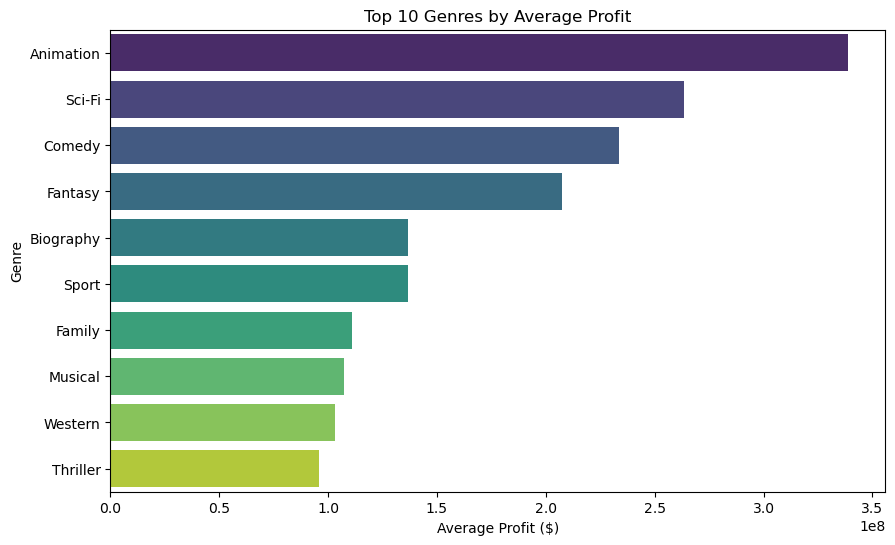

In [50]:
# Step 5: Get the top 10 genres by average profit
top_10_genres = average_profit_per_genre.sort_values(ascending=False).head(10)

# Step 6: Plot the top 10 genres
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='viridis')
plt.title('Top 10 Genres by Average Profit')
plt.xlabel('Average Profit ($)')
plt.ylabel('Genre')
plt.show()

### Conclusion

The top genres by average profit are Animation, Sci-Fi, Comedy, and Fantasy. These genres consistently yield high returns, suggesting that audiences are highly engaged with films in these categories.

### Recomendation

Recommendation: ABC Company should prioritize these genres in its initial productions to tap into profitable themes that are likely to perform well at the box office.

### Linear Regression : Relationship Between Domestic Gross and Worldwide Gross

In [51]:
X = gross_budget['domestic_gross']
y = gross_budget['worldwide_gross']
# Add a constant to the independent variable
X = sm.add_constant(X)
# Perform linear regression
model = sm.OLS(y, X).fit()
#summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     7441.
Date:                Fri, 15 Nov 2024   Prob (F-statistic):               0.00
Time:                        08:56:03   Log-Likelihood:                -21223.
No. Observations:                1081   AIC:                         4.245e+04
Df Residuals:                    1079   BIC:                         4.246e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.856e+06   3.18e+06     -1.

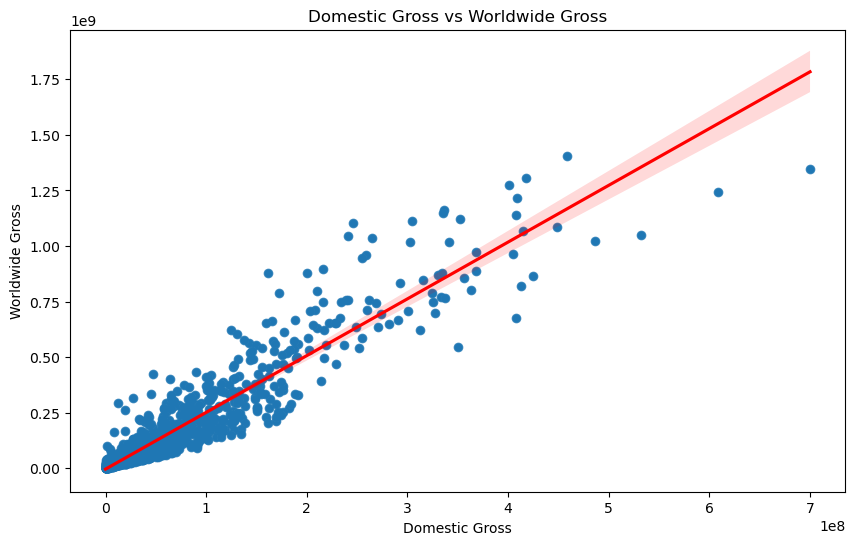

In [52]:
# Scatter plot to visualize the relationshipand a regression plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='domestic_gross', y='worldwide_gross', data=gross_budget)
sns.regplot(x='domestic_gross', y='worldwide_gross', data=gross_budget, line_kws={'color': 'red'})
plt.title('Domestic Gross vs Worldwide Gross')
plt.xlabel('Domestic Gross')
plt.ylabel('Worldwide Gross')
plt.show()

### Conclusion:

R-squared (0.873): Indicates that 87.3% of the variance in worldwide_gross is explained by domestic_gross, which suggests a strong linear relationship between the two variables. Adjusted R-squared (0.873) Confirms that the model's explanatory power is consistent when accounting for the number of predictors.

F-statistic (7441, p = 0.00): Shows that the overall model is statistically significant.
P-value for domestic_gross (0.000): Strong evidence that domestic_gross is a significant predictor of worldwide_gross.

### Reccomedation:

There is a strong and significant positive relationship between domestic gross revenue and worldwide gross revenue. Focus on strategies that maximize domestic revenue to boost global performance.
Analyze marketing and distribution strategies in domestic markets, as they are critical predictors of global success.
